In [7]:
import sys
from pathlib import Path

In [8]:
%load_ext autoreload
%autoreload 3 -p
%matplotlib inline

## imports

In [9]:
import cv2
import matplotlib.pyplot as plt

In [129]:
from yolov1.data.augmentations import create_augmentation_pipeline, create_transforms, apply_pipeline

Reloading 'yolov1.data.augmentations'.


In [18]:
from PIL import Image
import numpy as np
import torch

In [156]:
import yolov1
from yolov1.config import parse_config
from yolov1.utils.general import ncxcywh2xyxy

In [155]:
from yolov1.utils.vis import draw_boxes, draw_box

Reloading 'yolov1.utils.general'.
Reloading 'yolov1.data.augmentations'.


## load config

In [24]:
config_path = "../../yolov1/src/yolov1/configs/default.yaml"

In [25]:
config = parse_config(config_file=config_path)

## load img and labels

In [173]:
dummy_img = "../../.data/test/images/08c8b73e0c2e296e_jpg.rf.7IkYAamjZhnwsoXSrwKt.jpg"

In [176]:
dummy_label = "../../.data/test/labels/08c8b73e0c2e296e_jpg.rf.7IkYAamjZhnwsoXSrwKt.txt"

In [177]:
img = Image.open(dummy_img).convert("RGB")

In [180]:
label = np.expand_dims(np.array(Path(dummy_label).open().read().strip().split("\n")[0].split(" "),
                                dtype=np.float32),
                       axis=0)

In [181]:
img, label

(<PIL.Image.Image image mode=RGB size=416x416>,
 array([[1.        , 0.4939904 , 0.49639422, 0.45793268, 0.5588942 ]],
       dtype=float32))

## plot

tensor([[110.2500,  90.2500, 300.7500, 322.7500]])


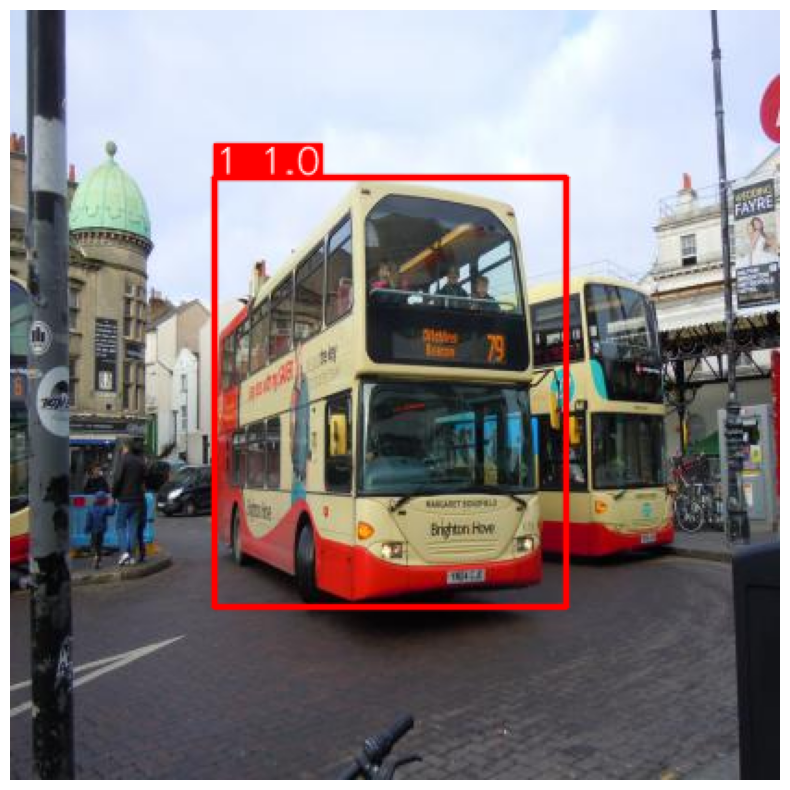

In [197]:
draw_boxes(img, torch.tensor(label))

## apply

In [212]:
from torchvision.transforms.functional import to_pil_image

In [247]:
tfms = create_transforms(config)

In [214]:
tfms = create_augmentation_pipeline(config)

In [215]:
boxes, classes = label[:, 1:], label[:, 0]

In [185]:
apply_pipeline?

Signature: apply_pipeline(image, bboxes, class_labels, pipeline)
Docstring: <no docstring>
File:      ~/workspace/projects/architectures-impl-pytorch/yolov1/src/yolov1/data/augmentations.py
Type:      function

In [248]:
tfmd = apply_pipeline(image=np.array(img), bboxes=boxes, class_labels=classes, pipeline=tfms)

In [249]:
boxes

array([[0.4939904 , 0.49639422, 0.45793268, 0.5588942 ]], dtype=float32)

In [250]:
tfmd[1]

tensor([[0.4940, 0.4964, 0.4579, 0.5589]], dtype=torch.float64)

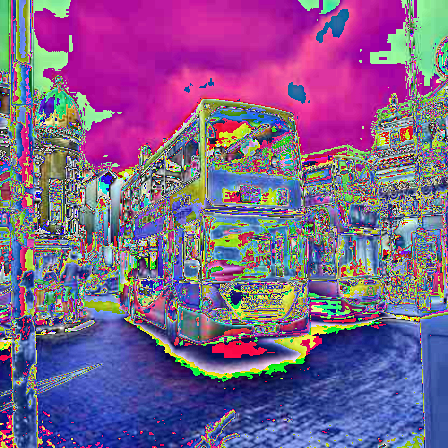

In [251]:
to_pil_image(tfmd[0], mode="RGB")

In [252]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = (
        int(bbox[0]*img.shape[0]), 
        int(bbox[1]*img.shape[1]),
        int(bbox[2]*img.shape[0]),
        int(bbox[3]*img.shape[1]),
    )
    x_min, y_min, x_max, y_max = list(map(int, ncxcywh2xyxy(bbox.unsqueeze(0), img.shape[1], img.shape[0])[0]))
    # x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    print(bbox)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name.get(category_id, "")
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

tensor([118.7308,  97.1923, 323.8846, 347.5769], dtype=torch.float64)


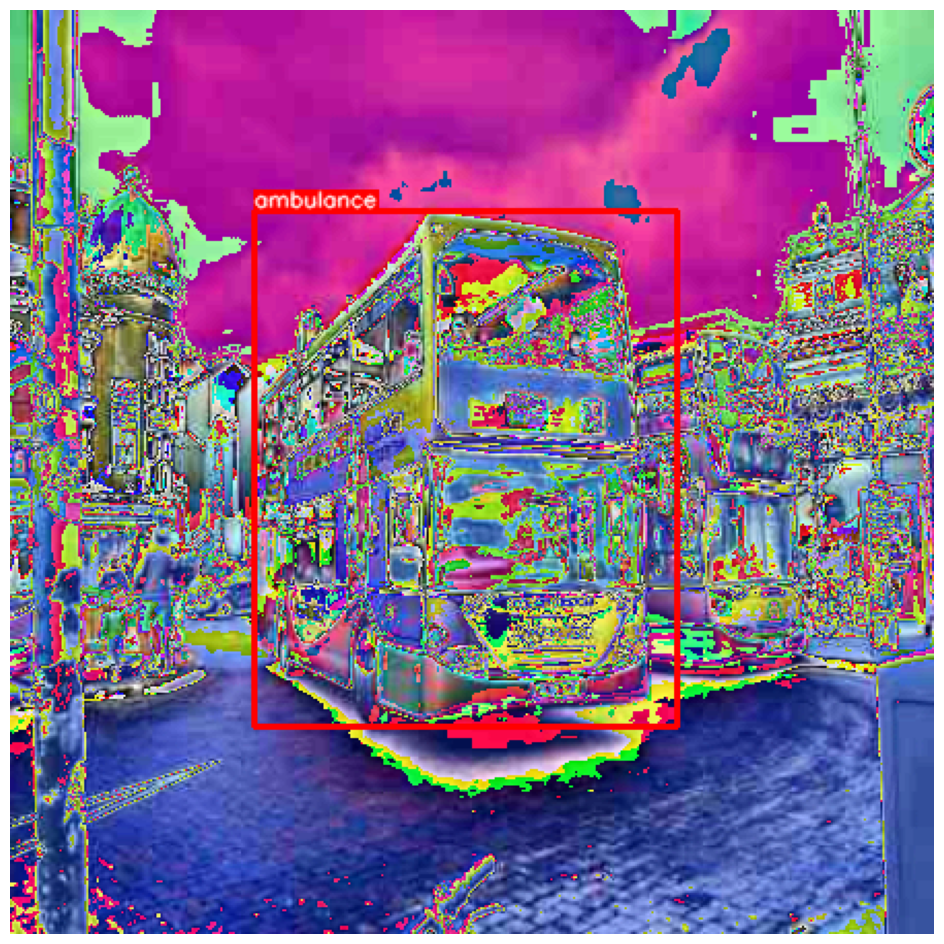

In [253]:
visualize(np.array(to_pil_image(tfmd[0])),
          tfmd[1],
          [0],
          {0: "ambulance" })

In [ ]:
tfmd[1][:, 0] * 2